https://chatgpt.com/share/67223cca-5410-8010-9408-d2ad1d74bbab

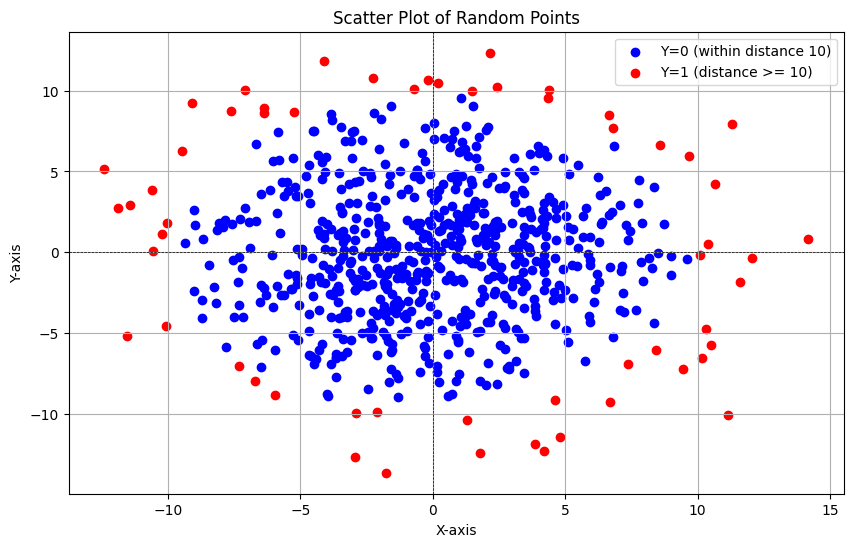

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Step 1: Generate 700 random points centered at (0, 0) with variance 20
np.random.seed(0)  # For reproducibility
num_points = 700
mean = [0, 0]
covariance = 20 * np.identity(2)  # Variance of 20

# Generate random points
points = np.random.multivariate_normal(mean, covariance, num_points)

# Calculate distances from the origin
distances = np.linalg.norm(points, axis=1)

# Step 2: Assign labels Y=0 for points within distance 10, Y=1 for the rest
labels = np.where(distances < 10, 0, 1)

# Step 3: Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(points[labels == 0][:, 0], points[labels == 0][:, 1], color='blue', label='Y=0 (within distance 10)')
plt.scatter(points[labels == 1][:, 0], points[labels == 1][:, 1], color='red', label='Y=1 (distance >= 10)')
plt.title('Scatter Plot of Random Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()


Step 1. generate 700 random points centered at (0,0) with variance 20, Y=0 for points in distance less than 10 and Y=1 for the rest

Step 2. make x3=f(x1, x2) where f is a gaussian function. scatter plot 3d (x1,x2,x3)  with Y color

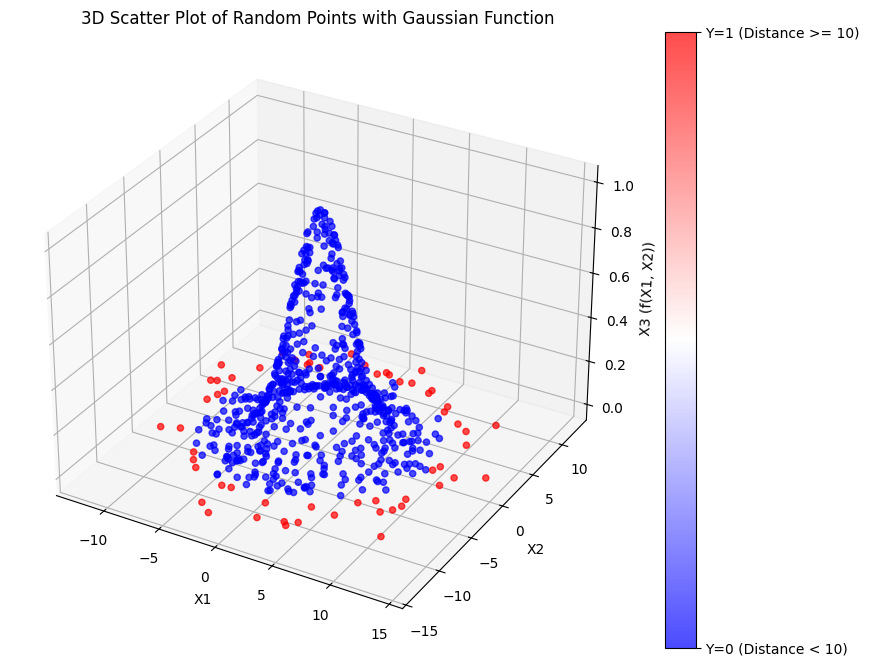

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Generate 700 random points centered at (0, 0) with variance 20
np.random.seed(0)  # For reproducibility
num_points = 700
mean = [0, 0]
covariance = 20 * np.identity(2)  # Variance of 20

# Generate random points
points = np.random.multivariate_normal(mean, covariance, num_points)

# Calculate distances from the origin
distances = np.linalg.norm(points, axis=1)

# Assign labels Y=0 for points within distance 10, Y=1 for the rest
labels = np.where(distances < 10, 0, 1)

# Step 2: Define Gaussian function f(x1, x2)
def gaussian_function(x1, x2):
    return np.exp(-0.1 * (x1**2 + x2**2))  # A Gaussian function

# Calculate x3 using the Gaussian function
x3 = gaussian_function(points[:, 0], points[:, 1])

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on labels
sc = ax.scatter(points[:, 0], points[:, 1], x3, c=labels, cmap='bwr', alpha=0.7)
ax.set_title('3D Scatter Plot of Random Points with Gaussian Function')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3 (f(X1, X2))')

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Y=0 (Distance < 10)', 'Y=1 (Distance >= 10)'])

plt.show()


1. **生成 600 个随机点**：中心在 (0, 0)，方差为 10，距离小于 4 的点标记为 \( Y=0 \)，其余点标记为 \( Y=1 \)。
2. **计算 \( x_3 \)**：使用高斯函数 \( f(x_1, x_2) \) 计算第三个维度。
3. **绘制 3D 散点图**：根据标签 \( Y \) 着色。
4. **绘制线性超平面**：确保超平面能够分离 \( Y=0 \) 和 \( Y=1 \) 的点。

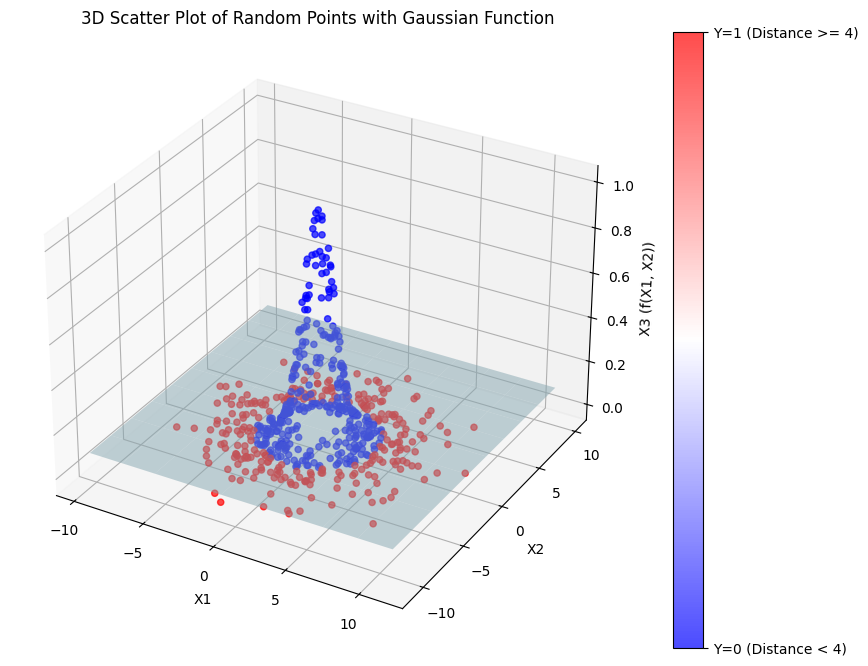

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

# Step 1: Generate 600 random points centered at (0, 0) with variance 10
np.random.seed(0)  # For reproducibility
num_points = 600
mean = [0, 0]
covariance = 10 * np.identity(2)  # Variance of 10

# Generate random points
points = np.random.multivariate_normal(mean, covariance, num_points)

# Calculate distances from the origin
distances = np.linalg.norm(points, axis=1)

# Assign labels Y=0 for points within distance 4, Y=1 for the rest
labels = np.where(distances < 4, 0, 1)

# Step 2: Define Gaussian function f(x1, x2)
def gaussian_function(x1, x2):
    return np.exp(-0.5 * (x1**2 + x2**2))  # A Gaussian function

# Calculate x3 using the Gaussian function
x3 = gaussian_function(points[:, 0], points[:, 1])

# Create 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on labels
sc = ax.scatter(points[:, 0], points[:, 1], x3, c=labels, cmap='bwr', alpha=0.7)
ax.set_title('3D Scatter Plot of Random Points with Gaussian Function')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3 (f(X1, X2))')

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Y=0 (Distance < 4)', 'Y=1 (Distance >= 4)'])

# Step 3: Fit a linear SVM to create a hyperplane
clf = svm.SVC(kernel='linear')
clf.fit(points, labels)

# Create a grid to plot the hyperplane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x1_grid, x2_grid = np.meshgrid(np.linspace(xlim[0], xlim[1], 10), np.linspace(ylim[0], ylim[1], 10))

# Get the hyperplane's coefficients
w = clf.coef_[0]
b = clf.intercept_[0]

# Calculate the corresponding x3 for the hyperplane using the Gaussian function
x3_hyperplane = gaussian_function(x1_grid, x2_grid)  # Use Gaussian to calculate the surface

# Calculate the decision boundary plane (set z level based on the SVM decision function)
decision_boundary = (-w[0] * x1_grid - w[1] * x2_grid - b)  # This gives you the z value for the hyperplane

# Set hyperplane to the Gaussian function value at the decision boundary level
# We can adjust the height of the hyperplane to the average height of the data points
average_x3 = np.mean(x3)
x3_hyperplane = average_x3 * np.ones_like(x1_grid)  # Fix the z-value of the hyperplane

# Plot the hyperplane at the average height for clarity
ax.plot_surface(x1_grid, x2_grid, x3_hyperplane, color='lightblue', alpha=0.5)

plt.show()



give me python code for :

Step 1. generate 700 random points centered at C1=(0,0) with variance 20, Y=0 for points in distance to C1 less than 10 and Y=1 for the rest. scatter plot

Step 2 generate another random points centered at (10,10) with variance 20, Y=0 for points in distance to C2 less than 5 and Y=1 for the rest. scatter plot

Step 3. make x3=f(x1, x2) where f is a gaussian function. scatter plot 3d (x1,x2,x3) with Y color

step 4: make a linear hyperplan (use light blue color) that can separate the points of Y=0, Y=1

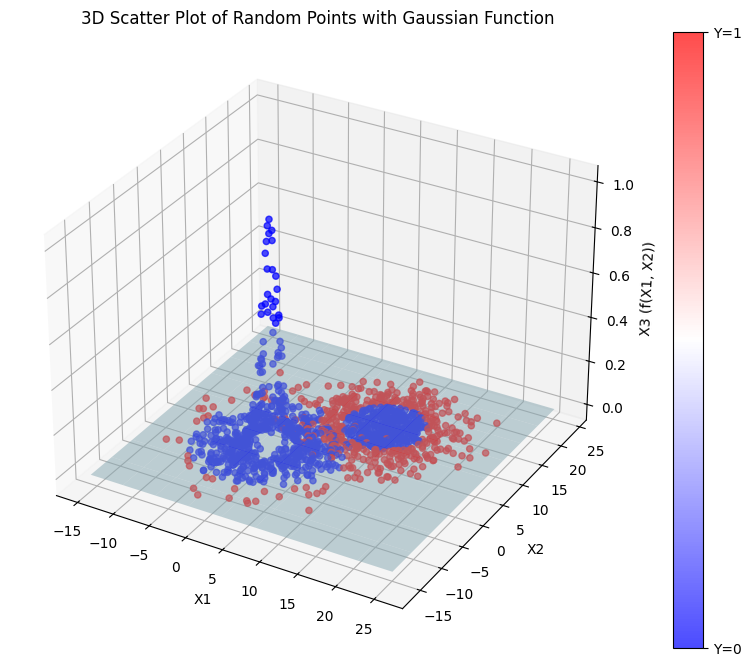

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

# Step 1: Generate 700 random points centered at C1=(0,0) with variance 20
np.random.seed(0)  # For reproducibility
num_points_1 = 700
mean_C1 = [0, 0]
covariance_C1 = 20 * np.identity(2)  # Variance of 20

# Generate random points
points_C1 = np.random.multivariate_normal(mean_C1, covariance_C1, num_points_1)

# Calculate distances from C1
distances_C1 = np.linalg.norm(points_C1, axis=1)

# Assign labels Y=0 for points within distance 10, Y=1 for the rest
labels_C1 = np.where(distances_C1 < 10, 0, 1)

# Step 2: Generate another random points centered at C2=(10,10) with variance 20
num_points_2 = 700
mean_C2 = [10, 10]
covariance_C2 = 20 * np.identity(2)  # Variance of 20

# Generate random points
points_C2 = np.random.multivariate_normal(mean_C2, covariance_C2, num_points_2)

# Calculate distances from C2
distances_C2 = np.linalg.norm(points_C2 - np.array(mean_C2), axis=1)

# Assign labels Y=0 for points within distance 5, Y=1 for the rest
labels_C2 = np.where(distances_C2 < 5, 0, 1)

# Combine both datasets
all_points = np.vstack((points_C1, points_C2))
all_labels = np.hstack((labels_C1, labels_C2))

# Step 3: Define Gaussian function f(x1, x2)
def gaussian_function(x1, x2):
    return np.exp(-0.5 * (x1**2 + x2**2))  # A Gaussian function

# Calculate x3 using the Gaussian function
x3 = gaussian_function(all_points[:, 0], all_points[:, 1])

# Create 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on labels
sc = ax.scatter(all_points[:, 0], all_points[:, 1], x3, c=all_labels, cmap='bwr', alpha=0.7)
ax.set_title('3D Scatter Plot of Random Points with Gaussian Function')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3 (f(X1, X2))')

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Y=0', 'Y=1'])

# Step 4: Fit a linear SVM to create a hyperplane
clf = svm.SVC(kernel='linear')
clf.fit(all_points, all_labels)

# Create a grid to plot the hyperplane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x1_grid, x2_grid = np.meshgrid(np.linspace(xlim[0], xlim[1], 10), np.linspace(ylim[0], ylim[1], 10))

# Get the hyperplane's coefficients
w = clf.coef_[0]
b = clf.intercept_[0]

# Calculate the corresponding x3 for the hyperplane using the Gaussian function
x3_hyperplane = gaussian_function(x1_grid, x2_grid)

# Calculate the decision boundary plane
decision_boundary = (-w[0] * x1_grid - w[1] * x2_grid - b)

# Set z-level for hyperplane; adjust for clarity
x3_hyperplane = np.zeros_like(x1_grid)  # Hyperplane at z=0 for clarity
ax.plot_surface(x1_grid, x2_grid, x3_hyperplane, color='lightblue', alpha=0.5)


plt.show()


In [42]:
import numpy as np
import plotly.graph_objects as go
from sklearn.svm import LinearSVC

# Step 1: Generate 700 random points centered at C1=(0,0) with variance 20
np.random.seed(0)  # For reproducibility
num_points_1 = 700
mean_C1 = [0, 0]
covariance_C1 = 20 * np.identity(2)  # Variance of 20

# Generate random points
points_C1 = np.random.multivariate_normal(mean_C1, covariance_C1, num_points_1)

# Calculate distances from C1
distances_C1 = np.linalg.norm(points_C1, axis=1)

# Assign labels Y=0 for points within distance 10, Y=1 for the rest
labels_C1 = np.where(distances_C1 < 10, 0, 1)

# Step 2: Generate another random points centered at C2=(10,10) with variance 20
num_points_2 = 700
mean_C2 = [10, 10]
covariance_C2 = 20 * np.identity(2)  # Variance of 20

# Generate random points
points_C2 = np.random.multivariate_normal(mean_C2, covariance_C2, num_points_2)

# Calculate distances from C2
distances_C2 = np.linalg.norm(points_C2 - np.array(mean_C2), axis=1)

# Assign labels Y=0 for points within distance 5, Y=1 for the rest
labels_C2 = np.where(distances_C2 < 5, 0, 1)

# Combine both datasets
all_points = np.vstack((points_C1, points_C2))
all_labels = np.hstack((labels_C1, labels_C2))

# Step 3: Define Gaussian function f(x1, x2)
def gaussian_function(x1, x2):
    return np.exp(-0.5 * (x1**2 + x2**2))  # A Gaussian function

# Calculate x3 using the Gaussian function
x3 = gaussian_function(all_points[:, 0], all_points[:, 1])

# Step 4: Fit a linear SVM to create a hyperplane
clf = LinearSVC()
clf.fit(all_points, all_labels)

# Get the hyperplane's coefficients
w = clf.coef_[0]
b = clf.intercept_[0]

# Create a grid for hyperplane visualization
x1_range = np.linspace(-10, 20, 30)
x2_range = np.linspace(-10, 20, 30)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Calculate the decision boundary
decision_boundary = (-w[0] * x1_grid - b) / w[1]

# Create 3D scatter plot with Plotly
fig = go.Figure()

# Add scatter plot for points with color based on labels
fig.add_trace(go.Scatter3d(
    x=all_points[:, 0],
    y=all_points[:, 1],
    z=x3,
    mode='markers',
    marker=dict(
        size=5,
        color=all_labels,  # Color by label
        colorscale=[[0, 'royalblue'], [1, 'coral']],  # Custom colors
        showscale=True,
        cmin=0,
        cmax=1,
        colorbar=dict(title='Label')
    ),
    name='Data Points'
))

# Calculate z values for the decision boundary surface
z_boundary = gaussian_function(x1_grid, x2_grid)

# Create a mesh grid for the decision boundary
fig.add_mesh3d(
    x=x1_grid.flatten(),
    y=x2_grid.flatten(),
    z=z_boundary.flatten(),
    opacity=0.5,  # Set a nice opacity for the hyperplane
    color='lightgray',  # Changed to a softer color
    name='Hyperplane'
)

# Layout adjustments
fig.update_layout(
    title='3D Scatter Plot with Hyperplane',
    scene=dict(
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='X3 (f(X1, X2))'
    ),
    showlegend=True
)

# Show the figure
fig.show()
